## Assignment : Syeda Fizza Raza - University Number: 6509217

# Coursework task 1 - Regression on dataset syield.csv

## Task 1.1

    1. Train a linear regression and polynomial regression models of degree ranging from 2 to 5, 
    to predict yield (Yield column) based on the day of the year (DOY column).

First importing all the libraries
numpy , pandas , linear regression from scikit learn and matplotlib



In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [3]:
os.getcwd() # This is where our dataset csv file should be placed

'/Users/fizza/Documents/university/DataScience/coursework'

## Reading the csv file and getting the data

In [5]:
syield_data=pd.read_csv('syield.csv')
syield_data.head()

,DOY,Yield
0,141,0.000000
1,141,0.000000
2,141,0.000000
3,141,0.000000
4,168,0.553333


## Exploring and preparing the dataset "syield"

In [7]:
syield_data.describe()

,DOY,Yield
count,40.00000,40.000000
mean,221.80000,13.969228
std,49.67133,12.961467
min,141.00000,0.000000
25%,185.00000,1.045355
50%,218.00000,13.317356
75%,263.00000,23.242131
max,303.00000,45.296889


In [8]:
syield_data.isna().sum()  # checking for empty values

DOY      0
Yield    0
dtype: int64

#### We want to create a simple model to predict the Yield of the crop based on one predictor "Day of the year"

## Defining input feature X and Target Variable y

For machine learning input features X should be in 2D array so we will get the first column from data frame using iloc function df.iloc[row_selection, column_selection] and reshape it in 2 dimensional numpy array.

In [12]:
X =syield_data.iloc[:, 0].values.reshape(-1,1) # reshape(-1,1) specifies the array to be in 2dimensional i.e. 1 column & many rows.
X

array([[141],
       [141],
       [141],
       [141],
       [168],
       [168],
       [168],
       [168],
       [185],
       [185],
       [185],
       [185],
       [196],
       [196],
       [196],
       [196],
       [211],
       [211],
       [211],
       [211],
       [225],
       [225],
       [225],
       [225],
       [243],
       [243],
       [243],
       [243],
       [263],
       [263],
       [263],
       [263],
       [283],
       [283],
       [283],
       [283],
       [303],
       [303],
       [303],
       [303]])

In [13]:
X.shape   

(40, 1)

Now we have X as 2 dimensional array with 40 rows and 1 column

#### For target/dependent variable Y we will create array with all rows from DOY column and get a single dimensional array

In [16]:
y= syield_data.iloc[:, 1].values
y

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.55333333,
        0.56756757,  0.56206089,  0.56098726,  1.05170732,  1.0262963 ,
        1.05170732,  1.0262963 ,  4.6359    ,  2.544     ,  2.42181481,
        5.0565    ,  7.42333333, 11.65094017,  7.39925758, 10.99033058,
       16.46884107, 16.7396003 , 17.17676471, 14.98377215, 22.58048571,
       17.55426941, 24.20755981, 16.09397531, 36.63404739, 30.262     ,
       45.29688889, 20.60917105, 30.06087805, 29.76597826, 38.43803279,
       31.4793617 , 23.20725696, 16.03401869, 29.30742188, 23.34675159])

## Scatter Plot of data values X(DOY) and y(Yield) 

Text(0, 0.5, 'Yield')

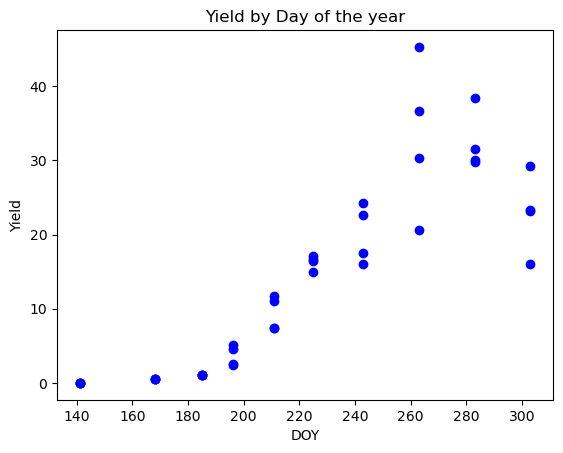

In [18]:
plt.scatter(X, y, color = "blue")
plt.title("Yield by Day of the year")
plt.xlabel("DOY")
plt.ylabel("Yield")

# Linear Regression Model

Now the goal is to find a line known as regression line that best fits the data points above using the scikit library for linear regression so that our model can predict future y values based on data points not present in the above scatter plot i.e. unseen by the model.

In [21]:
lreg = LinearRegression().fit(X,y)

### y Intercept

In [23]:
lreg.intercept_   # y_intercept i.e. the model predicts this y value when feature x value is 0

-36.12395493545398

### Coefficient

In [25]:
lreg.coef_   # coefficient or slope means the predicted value of y increases by this much when feature x increases by 1

array([0.22584843])

#### Predicting value of y  i.e.  Yield using the y_intercept and coefficient i.e. slope for every value of x i.e. DOY

In [27]:
y_predict= lreg.intercept_  +  X*(lreg.coef_)
y_predict

array([[-4.27932575],
       [-4.27932575],
       [-4.27932575],
       [-4.27932575],
       [ 1.81858197],
       [ 1.81858197],
       [ 1.81858197],
       [ 1.81858197],
       [ 5.65800534],
       [ 5.65800534],
       [ 5.65800534],
       [ 5.65800534],
       [ 8.14233812],
       [ 8.14233812],
       [ 8.14233812],
       [ 8.14233812],
       [11.53006463],
       [11.53006463],
       [11.53006463],
       [11.53006463],
       [14.6919427 ],
       [14.6919427 ],
       [14.6919427 ],
       [14.6919427 ],
       [18.75721451],
       [18.75721451],
       [18.75721451],
       [18.75721451],
       [23.27418319],
       [23.27418319],
       [23.27418319],
       [23.27418319],
       [27.79115187],
       [27.79115187],
       [27.79115187],
       [27.79115187],
       [32.30812055],
       [32.30812055],
       [32.30812055],
       [32.30812055]])

Another simple way of predicting is using predict function which returns single dimension array

In [29]:
y_predict=lreg.predict(X)
y_predict

array([-4.27932575, -4.27932575, -4.27932575, -4.27932575,  1.81858197,
        1.81858197,  1.81858197,  1.81858197,  5.65800534,  5.65800534,
        5.65800534,  5.65800534,  8.14233812,  8.14233812,  8.14233812,
        8.14233812, 11.53006463, 11.53006463, 11.53006463, 11.53006463,
       14.6919427 , 14.6919427 , 14.6919427 , 14.6919427 , 18.75721451,
       18.75721451, 18.75721451, 18.75721451, 23.27418319, 23.27418319,
       23.27418319, 23.27418319, 27.79115187, 27.79115187, 27.79115187,
       27.79115187, 32.30812055, 32.30812055, 32.30812055, 32.30812055])

We can also predict by passing single value in a matrix format in predict function

In [31]:
# y_predict=lreg.predict([[141]])
# y_predict

### Plotting the line of best fit

Text(0, 0.5, 'Yield')

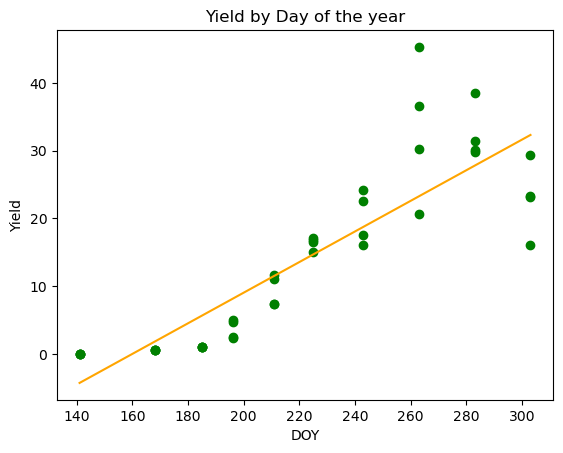

In [33]:
plt.plot(X, y,"o", color = "green")
plt.plot(X, y_predict , color="orange")
plt.title("Yield by Day of the year")
plt.xlabel("DOY")
plt.ylabel("Yield")

## Task 1.2
## Model Evaluation metrics
How good is our model to determine Crop Yield from DOY ?

### R^2 (R-squared)
#### We will use R squared metric which is coefficient of determination - score closer to 1.0 means the model has high level of correlation

In [35]:
RSquared =  lreg.score(X,y).round(2) 
print("\n R-Squared = ", RSquared)


 R-Squared =  0.75


## Train - Test Split (Splitting data into training and testing --> train 70% : test 30%)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train , X_test , y_train, y_test=train_test_split(X,y,test_size=.3, random_state=40)

Scaling the data after the train test split

In [40]:
from sklearn.preprocessing import MinMaxScaler   #### Scaling after the split
scaler = MinMaxScaler()   
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)      
print("x_train dataset: \n", X_train)
print("y_train dataset: \n", y_train)

x_train dataset: 
 [[0.43209877]
 [0.27160494]
 [0.        ]
 [1.        ]
 [0.87654321]
 [0.75308642]
 [0.33950617]
 [0.33950617]
 [0.51851852]
 [0.27160494]
 [0.62962963]
 [0.51851852]
 [0.43209877]
 [0.        ]
 [0.27160494]
 [0.75308642]
 [1.        ]
 [0.87654321]
 [0.51851852]
 [0.27160494]
 [0.75308642]
 [0.43209877]
 [1.        ]
 [0.33950617]
 [0.        ]
 [0.16666667]
 [0.62962963]
 [0.16666667]]
y_train dataset: 
 [ 7.39925758  1.0262963   0.         23.34675159 30.06087805 45.29688889
  2.42181481  5.0565     16.46884107  1.05170732 24.20755981 16.7396003
 11.65094017  0.          1.0262963  36.63404739 29.30742188 29.76597826
 14.98377215  1.05170732 20.60917105 10.99033058 16.03401869  4.6359
  0.          0.56098726 16.09397531  0.56206089]


Printing x test and y test dataset

In [42]:
print("x_test dataset: \n", X_test)
print("y_test dataset: \n", y_test)

x_test dataset: 
 [[0.62962963]
 [0.51851852]
 [0.62962963]
 [0.75308642]
 [0.        ]
 [0.43209877]
 [0.16666667]
 [0.16666667]
 [0.87654321]
 [1.        ]
 [0.33950617]
 [0.87654321]]
y_test dataset: 
 [17.55426941 17.17676471 22.58048571 30.262       0.          7.42333333
  0.55333333  0.56756757 31.4793617  23.20725696  2.544      38.43803279]


###  Plot graph of traing data

Text(0, 0.5, 'Yield')

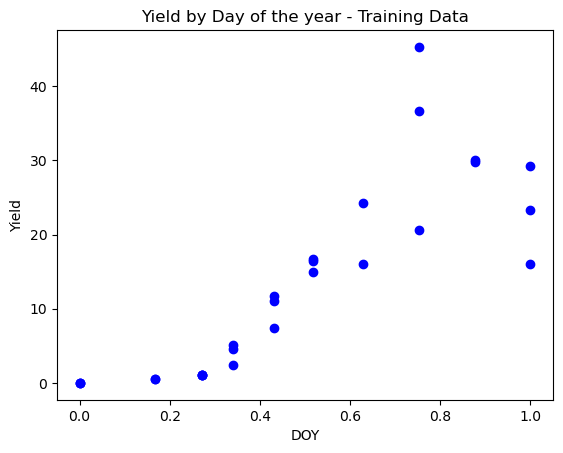

In [44]:
plt.plot(X_train, y_train,"o", color = "blue")
plt.title("Yield by Day of the year - Training Data")
plt.xlabel("DOY")
plt.ylabel("Yield")

###  Plot graph of Test data

Text(0, 0.5, 'Yield')

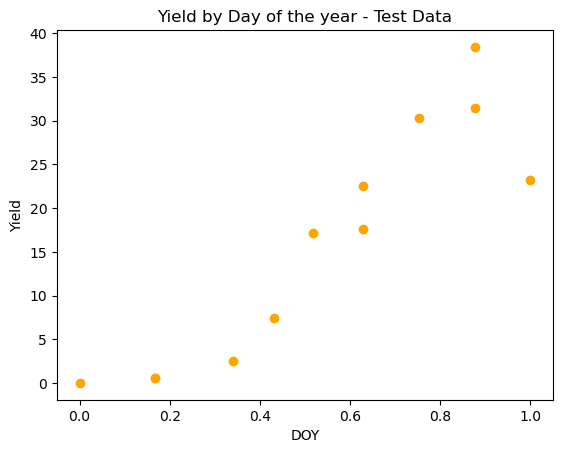

In [46]:
plt.plot(X_test, y_test,"o", color = "orange")
plt.title("Yield by Day of the year - Test Data")
plt.xlabel("DOY")
plt.ylabel("Yield")

### Fitting our model using training data

In [48]:
lreg.fit(X_train, y_train)

LinearRegression()

### R^2 For Training Data

In [50]:
R2TR=lreg.score(X_train, y_train).round(2)
print ("\n R^2 TRAINING data: " , R2TR ) # R^2 (R-squared) on training data


 R^2 TRAINING data:  0.71


### Predicting value of y(yield) using Training Data

In [52]:
y_predict_train=lreg.predict(X_train)
y_predict_train , y_train       # seeing both y predicted and y training values

(array([11.25746021,  5.57763219, -4.03438446, 31.35531321, 26.98621473,
        22.61711626,  7.98063636,  7.98063636, 14.31582915,  5.57763219,
        18.24801778, 14.31582915, 11.25746021, -4.03438446,  5.57763219,
        22.61711626, 31.35531321, 26.98621473, 14.31582915,  5.57763219,
        22.61711626, 11.25746021, 31.35531321,  7.98063636, -4.03438446,
         1.86389849, 18.24801778,  1.86389849]),
 array([ 7.39925758,  1.0262963 ,  0.        , 23.34675159, 30.06087805,
        45.29688889,  2.42181481,  5.0565    , 16.46884107,  1.05170732,
        24.20755981, 16.7396003 , 11.65094017,  0.        ,  1.0262963 ,
        36.63404739, 29.30742188, 29.76597826, 14.98377215,  1.05170732,
        20.60917105, 10.99033058, 16.03401869,  4.6359    ,  0.        ,
         0.56098726, 16.09397531,  0.56206089]))

### Task 1.4
### Plotting Linear Regression line for Training Data

Text(0, 0.5, 'Yield')

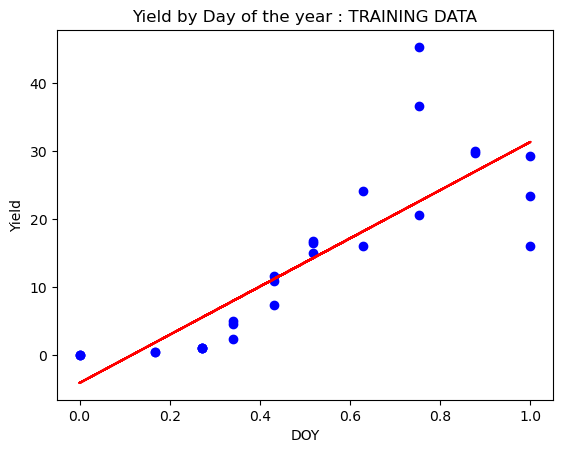

In [54]:
plt.plot(X_train, y_train,"o", color = "blue")
plt.plot(X_train, y_predict_train , color="red")
plt.title("Yield by Day of the year : TRAINING DATA")
plt.xlabel("DOY")
plt.ylabel("Yield")

### Lets use Test data that the model has not seen before and predict value of y(Yield)

In [56]:
y_predict_test= lreg.predict(X_test)
y_predict_test , y_test   # display both predicted and actual y values i.e. yield values

(array([18.24801778, 14.31582915, 18.24801778, 22.61711626, -4.03438446,
        11.25746021,  1.86389849,  1.86389849, 26.98621473, 31.35531321,
         7.98063636, 26.98621473]),
 array([17.55426941, 17.17676471, 22.58048571, 30.262     ,  0.        ,
         7.42333333,  0.55333333,  0.56756757, 31.4793617 , 23.20725696,
         2.544     , 38.43803279]))

### R^2 for Test Data

In [58]:
R2TS=lreg.score(X_test, y_test)
print("\n R-Squared TEST data: ",R2TS)   # R squared on test(unseen) data


 R-Squared TEST data:  0.8192067346519118


### Plotting Linear Regression line for Test Data

Text(0, 0.5, 'Yield')

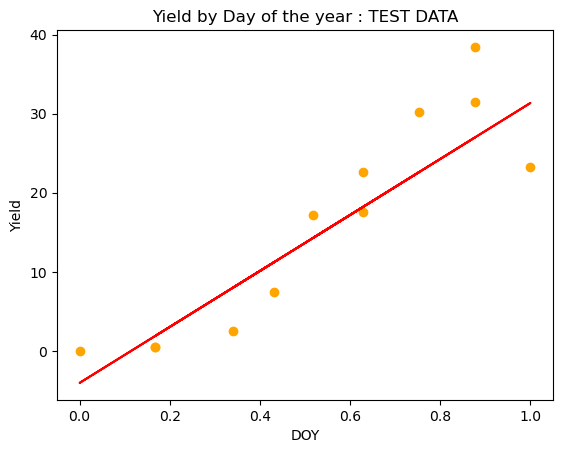

In [60]:
plt.plot(X_test, y_test,"o", color = "orange")
plt.plot(X_test, y_predict_test , color="red")
plt.title("Yield by Day of the year : TEST DATA")
plt.xlabel("DOY")
plt.ylabel("Yield")

### Scatter plot with regression line for both Test & Train data

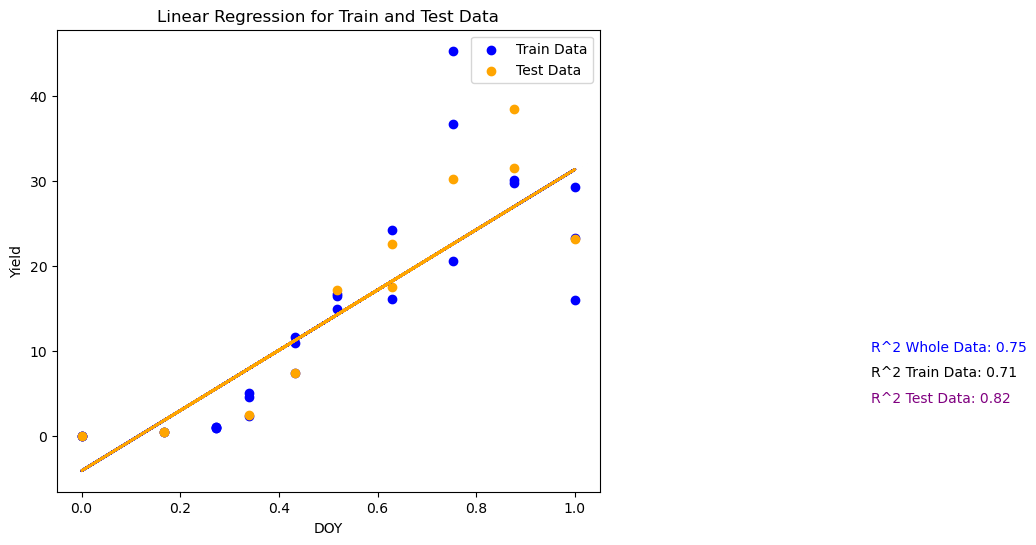

In [62]:
plt.figure(figsize=(7, 6))
# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train, y_predict_train, color='blue', linewidth=2)

# Scatter plot for testing data
plt.scatter(X_test, y_test, color='orange', label='Test Data')
plt.plot(X_test, y_predict_test, color='orange', linewidth=2)
plt.title('Linear Regression for Train and Test Data') # fit line means predictions for respective test or train data
plt.xlabel('DOY')
plt.ylabel('Yield')

plt.legend()
plt.text(1.6, 10, f'R^2 Whole Data: {RSquared:.2f}', fontsize=10, color='Blue')
plt.text(1.6, 7, f'R^2 Train Data: {R2TR:.2f}', fontsize=10, color='Black')
plt.text(1.6, 4, f'R^2 Test Data: {R2TS:.2f}', fontsize=10, color='Purple')
plt.show()



## Task 1.3
## R^2 score Analysis 
#### R^2 score for whole data means that the model explains 75% of variance in the yield target variable.
#### R^2 score for Train Data is 71% since it does not have the whole data so it will be slightly less than the whole data but since its not a big difference it means the model fits well without overfitting.
#### The R^2 Test score is higher than both Training and whole data which means model explains 82% of the variance in the target variable but we might need to check the Test train data split and cross validate again.

# Calculating Error metrics 

## MAE (mean absolute error) Training Data

In [65]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error , r2_score 

In [66]:
MAETR = mean_absolute_error(y_train,y_predict_train)
print("MAE Training Data:\n " , MAETR)

MAE Training Data:
  4.732288003114727


## MSE (mean squared error) Training Data

In [68]:
MSETR = mean_squared_error(y_train, y_predict_train)
print ("\n MSE Training Data: ", MSETR)


 MSE Training Data:  45.950461187536575


## RMSE (root_mean_squared_error) Training Data

In [70]:
RMSETR = root_mean_squared_error(y_train, y_predict_train)
print ("\n RMSE Training Data: ", RMSETR)


 RMSE Training Data:  6.778676949636749


## MAE (mean absolute error) TEST Data

In [72]:
MAETS = mean_absolute_error(y_test,y_predict_test)
print("\n MAE Test Data: " , MAETS)


 MAE Test Data:  4.628091720908958


## MSE (Mean squared error) Test Data

In [74]:
MSETS = mean_squared_error(y_test, y_predict_test)
print ("\n MSE Test Data: ", MSETS)


 MSE Test Data:  30.627995726445487


## RMSE (root mean squared error) Test Data

In [76]:
RMSETS = root_mean_squared_error(y_test, y_predict_test)
print ("\n RMSE Test Data: ", RMSETS)


 RMSE Test Data:  5.534256564927713


### Comparing error metrics for Test and train data

In [78]:
print("Training Data:")
print(f"MAE: {MAETR:.4f}")
print(f"MSE: {MSETR:.4f}")
print(f"RMSE: {RMSETR:.4f}")
print(f"R2: {R2TR:.4f}\n")

print("Test Data:")
print(f"MAE: {MAETS:.4f}")
print(f"MSE: {MSETS:.4f}")
print(f"RMSE: {RMSETS:.4f}")
print(f"R2: {R2TS:.4f}\n")

Training Data:
MAE: 4.7323
MSE: 45.9505
RMSE: 6.7787
R2: 0.7100

Test Data:
MAE: 4.6281
MSE: 30.6280
RMSE: 5.5343
R2: 0.8192



The MAE - Mean absolute error, which tells us how far off our predictions are from actual values, for Test Data compared to Training data is slightly lower which means model predicts better on test data in terms of average errors for predicted values.

MSE - It tells us the mean squared deviations from the actual values.For Test data MSE is lower than Training data which might mean that Test data split is simpler than the training data or that training data might have more outliers. It looks from MSE on test data that model performs better on unseen data which tells us model is not overfitting.

RMSE - It focuses more on larger errors and penalises them more, so for Test data RMSE is lower than for training data which means model is performing better on unseen test data.

R^2 - It tells us goodness of fit of our model i.e. how much the variance in our target variable is explained by the input features. A higher R2 score means a model fits better on the data and lower value means model does not capture the data well. 
From the R2 score calculated above we can see that it is higher in Test Data i.e.0.82 compared to 0.7 in training data which also means model performs better on our test Data.

### The model is not overfitting as it seems to generalise well as test errors seem to be lower than the training data. To check it is not underfitting we can compare the difference between actual and predicted values i.e. residuals for both train and test data. 
#### The reason that model performs better on test data may also be due to presence of fewer outliers compared to in the training data.


### Residual Errors analysis

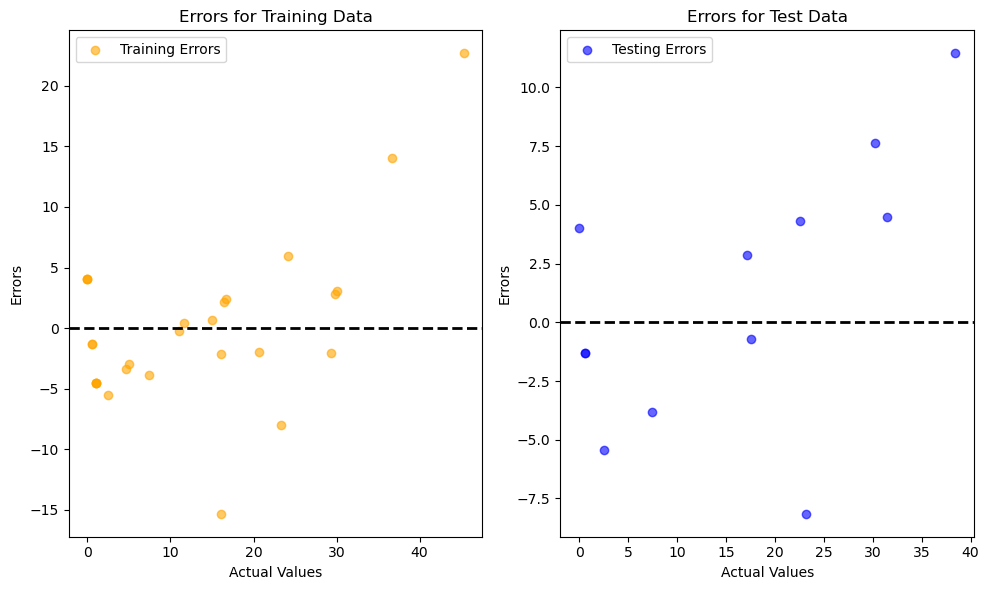

In [81]:
# Calculate residuals/errors for training and test data
train_errors = y_train - y_predict_train
test_errors = y_test - y_predict_test

# Plot residuals for training and test data
plt.figure(figsize=(10, 6))

# Residuals for Training Data
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_errors, color='orange', alpha=0.6, label='Training Errors')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Errors for Training Data')
plt.xlabel('Actual Values')
plt.ylabel('Errors')
plt.legend()

# Residuals for Test Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_errors, color='blue', alpha=0.6, label='Testing Errors')
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Errors for Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Errors')
plt.legend()

plt.tight_layout()
plt.show()

### Model seems to be underfitting as there are larger residuals in the training data and test data. Polynomial regression model might be better for predicting the yield in syield dataset

# Polynomial Regression model
## Task 1.1 and 1.2 for Polynomial Regression

#### Applying and training Polynomial regression on train and test Data for syield data to predict yield

Degree 2 Polynomial Regression:
Training Data - MAE: 4.8022, MSE: 45.4802, RMSE: 6.7439, R^2: 0.7138
Test Data - MAE: 4.6730, MSE: 30.9710, RMSE: 5.5652, R^2: 0.8172


Degree 3 Polynomial Regression:
Training Data - MAE: 2.6937, MSE: 20.4350, RMSE: 4.5205, R^2: 0.8714
Test Data - MAE: 2.6064, MSE: 12.6682, RMSE: 3.5592, R^2: 0.9252


Degree 4 Polynomial Regression:
Training Data - MAE: 2.6480, MSE: 18.7500, RMSE: 4.3301, R^2: 0.8820
Test Data - MAE: 1.9602, MSE: 7.3539, RMSE: 2.7118, R^2: 0.9566


Degree 5 Polynomial Regression:
Training Data - MAE: 2.5272, MSE: 18.6184, RMSE: 4.3149, R^2: 0.8828
Test Data - MAE: 1.8531, MSE: 8.3738, RMSE: 2.8938, R^2: 0.9506




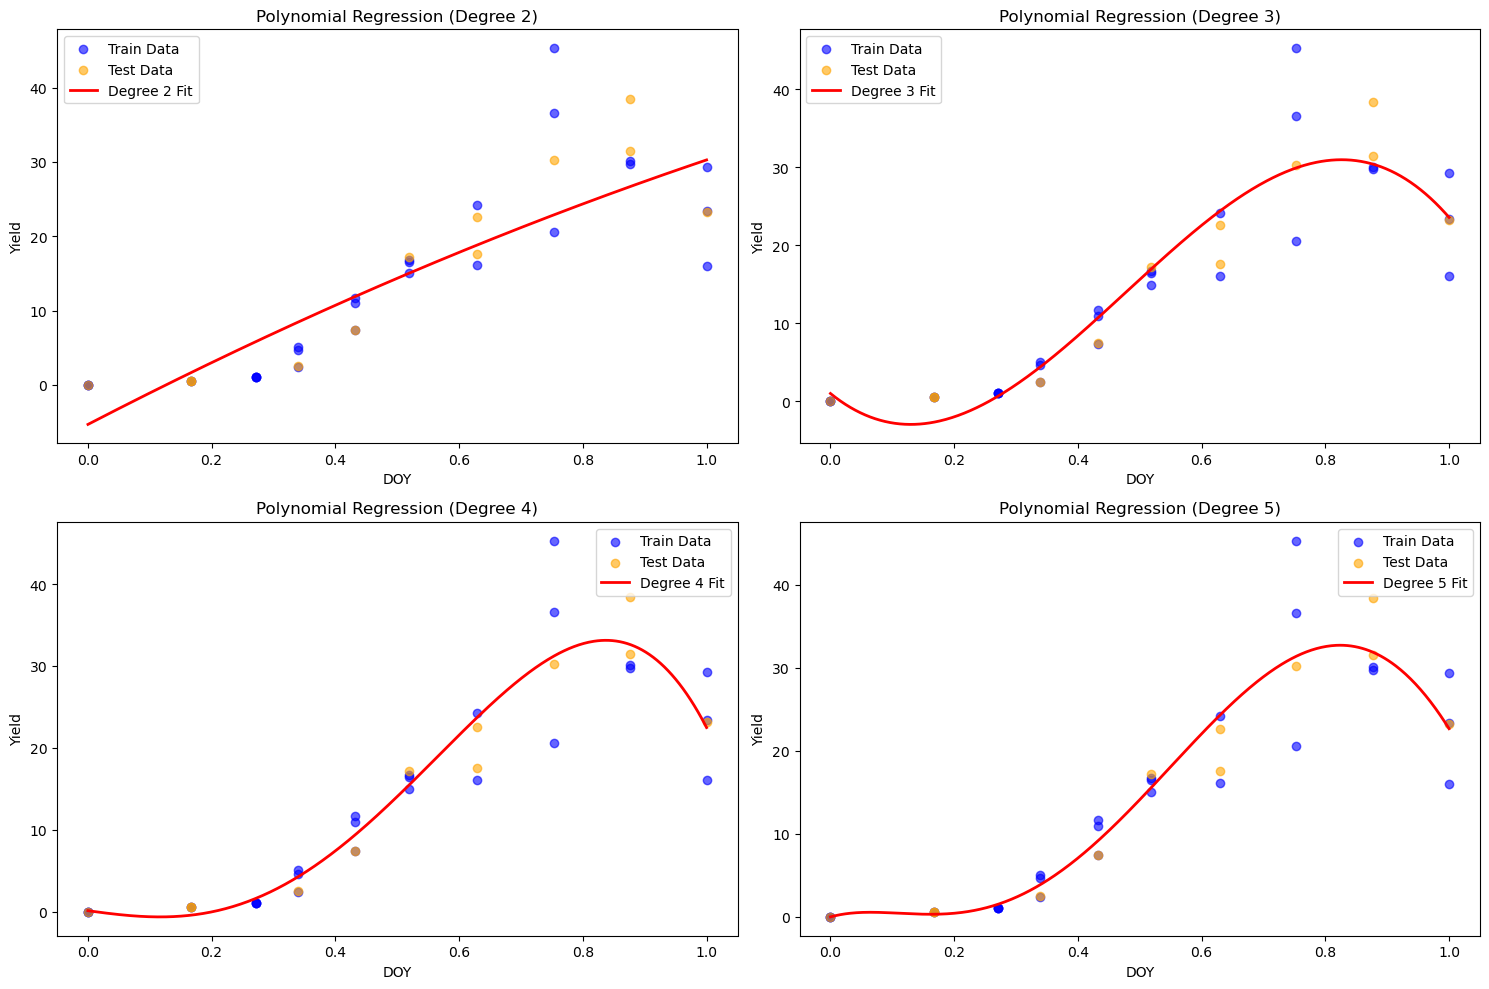

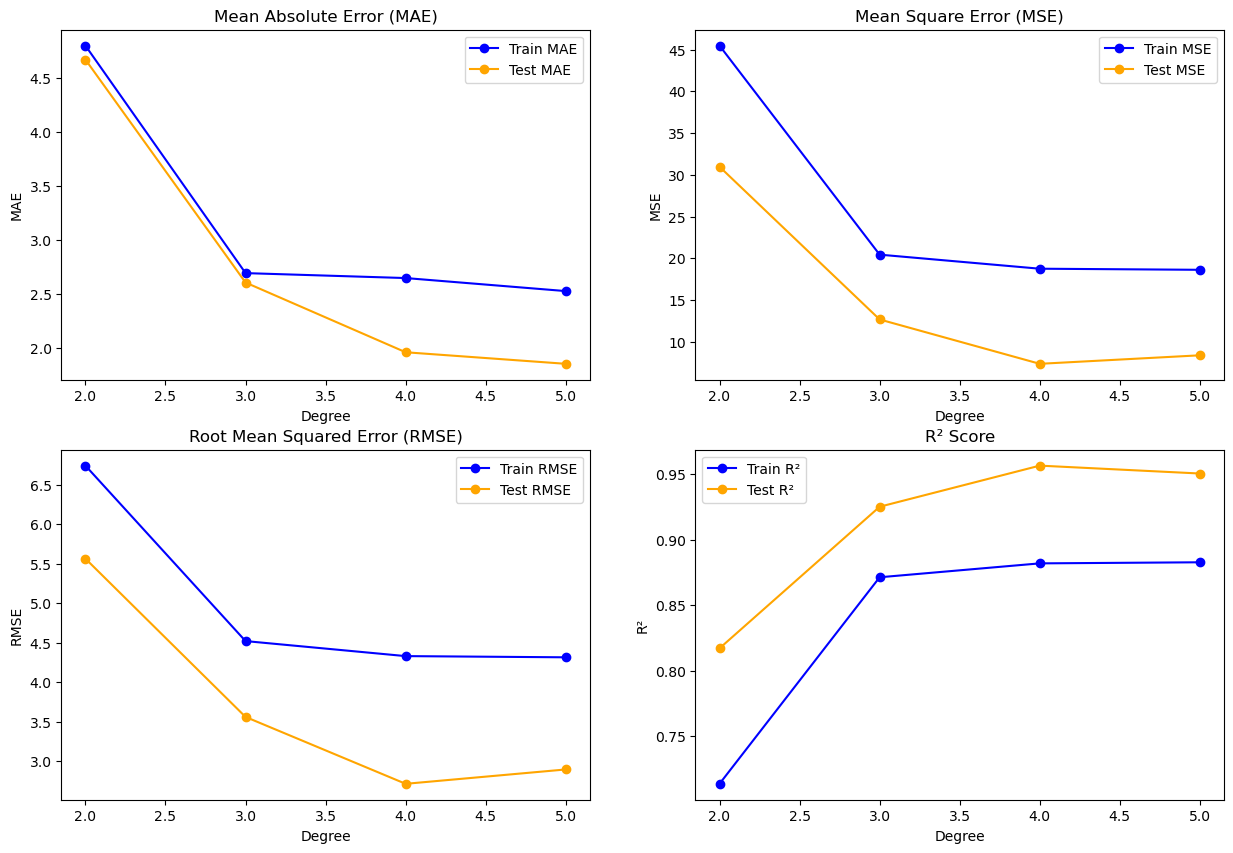

In [85]:
plt.figure(figsize=(15, 10))
degrees = [2, 3, 4, 5]  # Setting Polynomial degree range from 2 to 5   
mae_train_list = []
mae_test_list = []
mse_train_list= []
mse_test_list= []
rmse_train_list = []
rmse_test_list = []
r2_train_list = []
r2_test_list = []
# Loop through each degree
for degree in degrees:    
    poly = PolynomialFeatures(degree=degree)  # Set the polynomial features of degree in iteration
    # Fit and transform the training data
    X_train_poly = poly.fit_transform(X_train)  # Transforming the training data feature into its polynomial terms
    X_test_poly = poly.transform(X_test)  # Transforming the test features into its polynomial features using the training transformation
    lr = LinearRegression()  # Now we train the linear model on the transformed polynomial features
    lr.fit(X_train_poly, y_train)
    
    # Predict using train and test polynomial features 
    y_train_pred = lr.predict(X_train_poly)
    y_test_pred = lr.predict(X_test_poly)
    
    # Evaluation metrics for training data
    mae_train = mean_absolute_error(y_train, y_train_pred)       
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    

    # Evaluation metrics for test data
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Print model evaluation metrics for each degree
    print(f"Degree {degree} Polynomial Regression:")
    print(f"Training Data - MAE: {mae_train:.4f}, MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R^2: {r2_train:.4f}")
    print(f"Test Data - MAE: {mae_test:.4f}, MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R^2: {r2_test:.4f}")
    print("\n")
    
    # Saving the metrics in a list
    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    
    # Plot the polynomial fit (for training and test data)
    X_range = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)  # Creating a range of values within the same range of training data
    X_range_poly = poly.transform(X_range)  # Transform the range into polynomial features
    
    plt.subplot(2, 2, degrees.index(degree) + 1)  # Making a grid of subplots
    plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Train Data')  # Scatter plot for training data
    plt.scatter(X_test, y_test, color='orange', alpha=0.6, label='Test Data')  # Scatter plot for test data
    plt.plot(X_range, lr.predict(X_range_poly), color='red', linewidth=2, label=f'Degree {degree} Fit')  # Polynomial curve for the current degree
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel('DOY')
    plt.ylabel('Yield')
    plt.legend()

# Show the plots for all polynomial degrees
plt.tight_layout()
plt.show()

# Plotting the metrics for comparison
plt.figure(figsize=(15, 10))

# Plot MAE
plt.subplot(2, 2, 1)
plt.plot(degrees, mae_train_list, label="Train MAE", marker='o', color='blue')
plt.plot(degrees, mae_test_list, label="Test MAE", marker='o', color='orange')
plt.title("Mean Absolute Error (MAE)")
plt.xlabel("Degree")
plt.ylabel("MAE")
plt.legend()

# Plot MSE
plt.subplot(2, 2, 2)
plt.plot(degrees, mse_train_list, label="Train MSE", marker='o', color='blue')
plt.plot(degrees, mse_test_list, label="Test MSE", marker='o', color='orange')
plt.title("Mean Square Error (MSE)")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()

# Plot RMSE
plt.subplot(2, 2, 3)
plt.plot(degrees, rmse_train_list, label="Train RMSE", marker='o', color='blue')
plt.plot(degrees, rmse_test_list, label="Test RMSE", marker='o', color='orange')
plt.title("Root Mean Squared Error (RMSE)")
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.legend()

# Plot R² Score
plt.subplot(2, 2, 4)
plt.plot(degrees, r2_train_list, label="Train R²", marker='o', color='blue')
plt.plot(degrees, r2_test_list, label="Test R²", marker='o', color='orange')
plt.title("R² Score")
plt.xlabel("Degree")
plt.ylabel("R²")
plt.legend()

# Final adjustments
plt.show()


We can see from above scatter plot for each degree that the line starts to fit better on the data points as the degree 
increases. For the error metrics plot we can see that the errors reduce in general when the degree increases e.g. the MSE for both training and test data is decreased. For test it went down from 30.9 in degree 2 to 7.3 in degree 4 and a slight increase again in degree 5 to 8.37.
R2 scores for each degree increases as well e.g. for test data it increases significantly from 0.81 in degree 2 to 0.95 in degree 4  but a slight decrease in degree 5. 

### Comparing model performance using metrics in bar plot

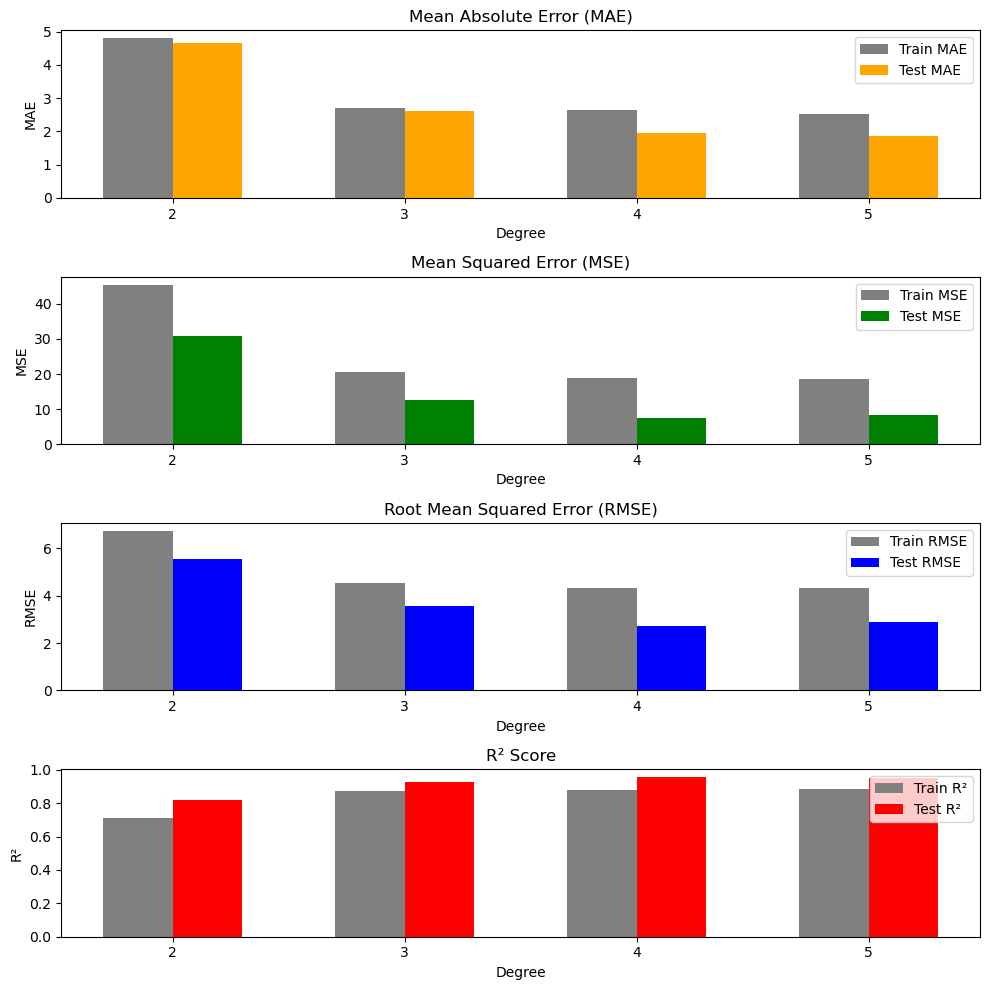

In [88]:
# Set up the figure
plt.figure(figsize=(10, 10))

# MAE Plot
plt.subplot(4, 1, 1)
plt.bar(np.array(degrees) - 0.15, mae_train_list, width=0.3, label="Train MAE", color="grey")
plt.bar(np.array(degrees) + 0.15, mae_test_list, width=0.3, label="Test MAE", color="orange")
plt.title("Mean Absolute Error (MAE)")
plt.xlabel("Degree")
plt.ylabel("MAE")
plt.xticks(degrees)
plt.legend()

# MSE Plot
plt.subplot(4, 1, 2)
plt.bar(np.array(degrees) - 0.15, mse_train_list, width=0.3, label="Train MSE", color="grey")
plt.bar(np.array(degrees) + 0.15, mse_test_list, width=0.3, label="Test MSE", color="green")
plt.title("Mean Squared Error (MSE)")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.xticks(degrees)
plt.legend()

# RMSE Plot
plt.subplot(4, 1, 3)
plt.bar(np.array(degrees) - 0.15, rmse_train_list, width=0.3, label="Train RMSE", color="grey")
plt.bar(np.array(degrees) + 0.15, rmse_test_list, width=0.3, label="Test RMSE", color="blue")
plt.title("Root Mean Squared Error (RMSE)")
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.legend()

# R² Plot
plt.subplot(4, 1, 4)
plt.bar(np.array(degrees) - 0.15, r2_train_list, width=0.3, label="Train R²", color="grey")
plt.bar(np.array(degrees) + 0.15, r2_test_list, width=0.3, label="Test R²", color="red")
plt.title("R² Score")
plt.xlabel("Degree")
plt.ylabel("R²")
plt.xticks(degrees)
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

As we can see from above bar plot for each degree for the evaluation metrics that the errors reduce as degree increases and also R2 increases with the higher degrees.

### Analysis of Linear Regression model performance vs Polynomial Regression model  
### Linear Regression model
R2 score is relatively low for train and test data in linear Regression model compared to best performing polynomial regression model with degree 3 or 4. The error metrics is also higher compared to errors in polynomial regression model. Linear regression model as discussed earlier while evaluating its metrics seems to be underfitting.


### Polynomial Regression model
#### Degree 2 : 
If we look at the error metrics we can see that the errors MAE , MSE and RMSE are high compared to pther degrees. R2 score of the model at degree 2 for training is 0.71 and test data is 0.82 which is decent and is not overfitting but could do better.It might be underfitting as R2 is higher than its training data but it may be due to data being simple in test.

#### Degree 3 : 
We can see the R2 score for training and test data both improve.It increases from 0.71 to 0.87 in training and increases from 0.82 to 0.92 in test data. Errors MSE , MAE , RMSE also reduce. It suggests that at degree 3 model fits better on the data.

#### Degree 4 : 
Similar improvement in R2 score in train and test compared to previous degrees and errors also reduce suggesting models better predictability and good fit.

#### Degree 5 : 
We can see the error metrics in test data RMSE and MSE have increased a little compared to degree 4. So it might be overfitting as error in test data is increased a little.

#### Looks like the best performing model is with degree "3" and "4" with highest R2 score and lowest Error metrics.

# Task 2 - Classification on dataset ATLAS.csv
## Task 2.1
## Logistic Regression

#### - Train a logistic regression model to predict the class of events i.e. signal or background from the dataset provided.




In [93]:
import pandas as pd

In [94]:
Atlas_dt=pd.read_csv('ATLAS.csv')

In [95]:
Atlas_dt.head(4)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Signal
0,243.128,96.455,158.618,90.253,0.693,56.238,1.581,3.615,13.597,264.586,...,2.121,376.410,46.248,-0.958,-0.444,42.759,-1.651,-1.445,157.638,0
1,139.751,74.028,111.619,44.266,2.119,104.723,-0.498,2.533,9.437,168.638,...,0.447,252.698,36.798,0.269,-1.254,31.816,-1.849,0.664,68.614,0
2,116.217,73.136,59.239,101.850,0.625,85.539,2.979,1.922,28.049,202.636,...,1.816,271.485,82.453,2.066,-1.210,58.216,1.442,-2.288,140.669,0
3,64.544,0.099,28.945,341.418,2.390,358.936,-1.181,0.714,35.293,508.349,...,-2.409,470.806,331.152,-1.693,0.615,41.742,0.697,1.083,409.977,0


### Lets check how many events or rows this data has and how many columns or features

In [97]:
Atlas_dt.shape

(10000, 30)

### so our data has 1000 data entries / rows / events   and  30 columns/features for each event or row

lets see the description of our Atlas data for each columns average value , minimum and maximum value , count etc

In [100]:
Atlas_dt.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Signal
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,122.432238,35.730594,78.630945,110.004998,2.451913,381.122838,-0.926090,2.002143,27.080270,279.891084,...,0.025936,332.362323,105.949206,0.004256,-0.022865,57.586905,-0.014073,-0.027625,181.527121,0.468800
std,58.412988,30.698610,40.231885,75.928861,1.765431,408.078718,3.632207,0.775695,27.890085,129.420527,...,1.810199,139.666719,67.362189,1.742736,1.810674,31.870495,2.059004,1.817829,107.022183,0.499051
min,12.665000,0.000000,11.709000,0.594000,0.000000,16.219000,-15.423000,0.400000,0.017000,112.626000,...,-3.141000,57.355000,30.130000,-4.442000,-3.141000,30.000000,-4.487000,-3.141000,60.137000,0.000000
25%,93.598500,11.590750,57.302250,55.985750,0.899000,114.355750,-2.741250,1.380000,3.956750,191.950000,...,-1.532250,238.193750,60.088500,-1.335250,-1.595250,37.189750,-1.665000,-1.596250,108.769000,0.000000
50%,113.463500,27.727500,71.415000,92.696000,2.152500,233.067000,-0.296500,1.953000,22.356000,246.025000,...,0.048000,302.344500,86.552500,-0.012500,-0.022000,47.868000,-0.010500,-0.078000,153.132000,0.000000
75%,133.763250,52.858000,88.835750,145.476000,3.750000,490.011750,0.889500,2.591000,38.863000,329.524250,...,1.578250,392.064000,130.421500,1.339250,1.559000,66.659750,1.639250,1.573250,219.830500,1.000000
max,931.277000,324.747000,733.658000,865.942000,7.915000,3755.333000,16.648000,5.244000,393.397000,1376.281000,...,3.141000,1512.665000,749.066000,4.439000,3.140000,449.974000,4.497000,3.141000,1190.256000,1.000000


#### Lets check if data has any missing values 

In [102]:
Atlas_dt.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
Signal    0
dtype: int64

#### So we have no missing values in our Atlas data which is good !

#### Lets apply logistic regression model on the data to predict whether an event is a signal or background as our target variable is a binary variable so its a classification problem

In [105]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score, classification_report, roc_curve, roc_auc_score
import seaborn as sns

#### Identifying target variable and feature variables from the data

In [107]:
target=Atlas_dt.Signal  # target 
features=Atlas_dt.drop('Signal', axis=1)  # features/ predictors for the event to be a signal or background

#### Visualising the data using scatter Plot to see how our data looks like with target and features 

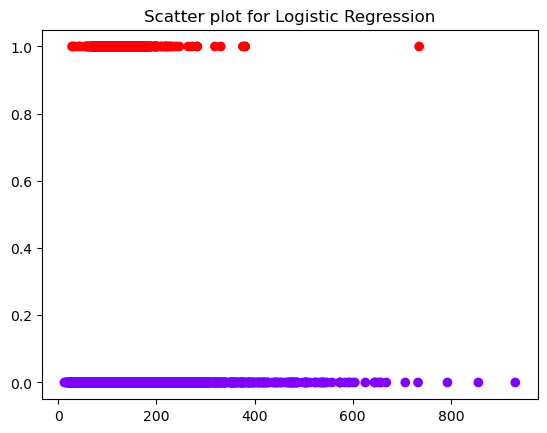

In [109]:
plt.scatter(features.V1,target,c=target, cmap='rainbow')
plt.title('Scatter plot for Logistic Regression')
plt.show()

#### Checking for Unbalanced data i.e. If one class instance is outbalanced by the occurance of another i.e. more Background than Signal instances

Signal(1) vs Background(0) distribution:
Signal
0    5312
1    4688
Name: count, dtype: int64


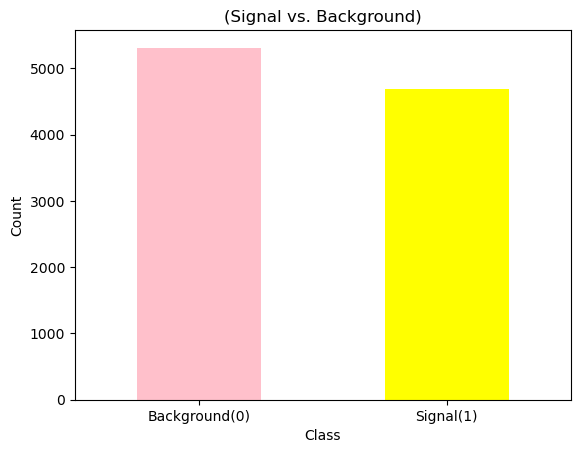

In [111]:
# Counting the Signal class count
class_counts = Atlas_dt['Signal'].value_counts()
print("Signal(1) vs Background(0) distribution:")
print(class_counts)

# Bar chart for class distribution
class_counts.plot(kind='bar', color=['Pink', 'yellow'])
plt.title("(Signal vs. Background)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Background(0)', 'Signal(1)'], rotation=0)
plt.show()


It looks like data is not unbalanced as no one class dominates the other by more than 70%.

## Preprocessing the data 

Plotting a pairplot to see if the data is in standardised form with same data range

,V1,V2,V3,V4,V5,V6
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,122.432238,35.730594,78.630945,110.004998,2.451913,381.122838
std,58.412988,30.698610,40.231885,75.928861,1.765431,408.078718
min,12.665000,0.000000,11.709000,0.594000,0.000000,16.219000
25%,93.598500,11.590750,57.302250,55.985750,0.899000,114.355750
50%,113.463500,27.727500,71.415000,92.696000,2.152500,233.067000
75%,133.763250,52.858000,88.835750,145.476000,3.750000,490.011750
max,931.277000,324.747000,733.658000,865.942000,7.915000,3755.333000


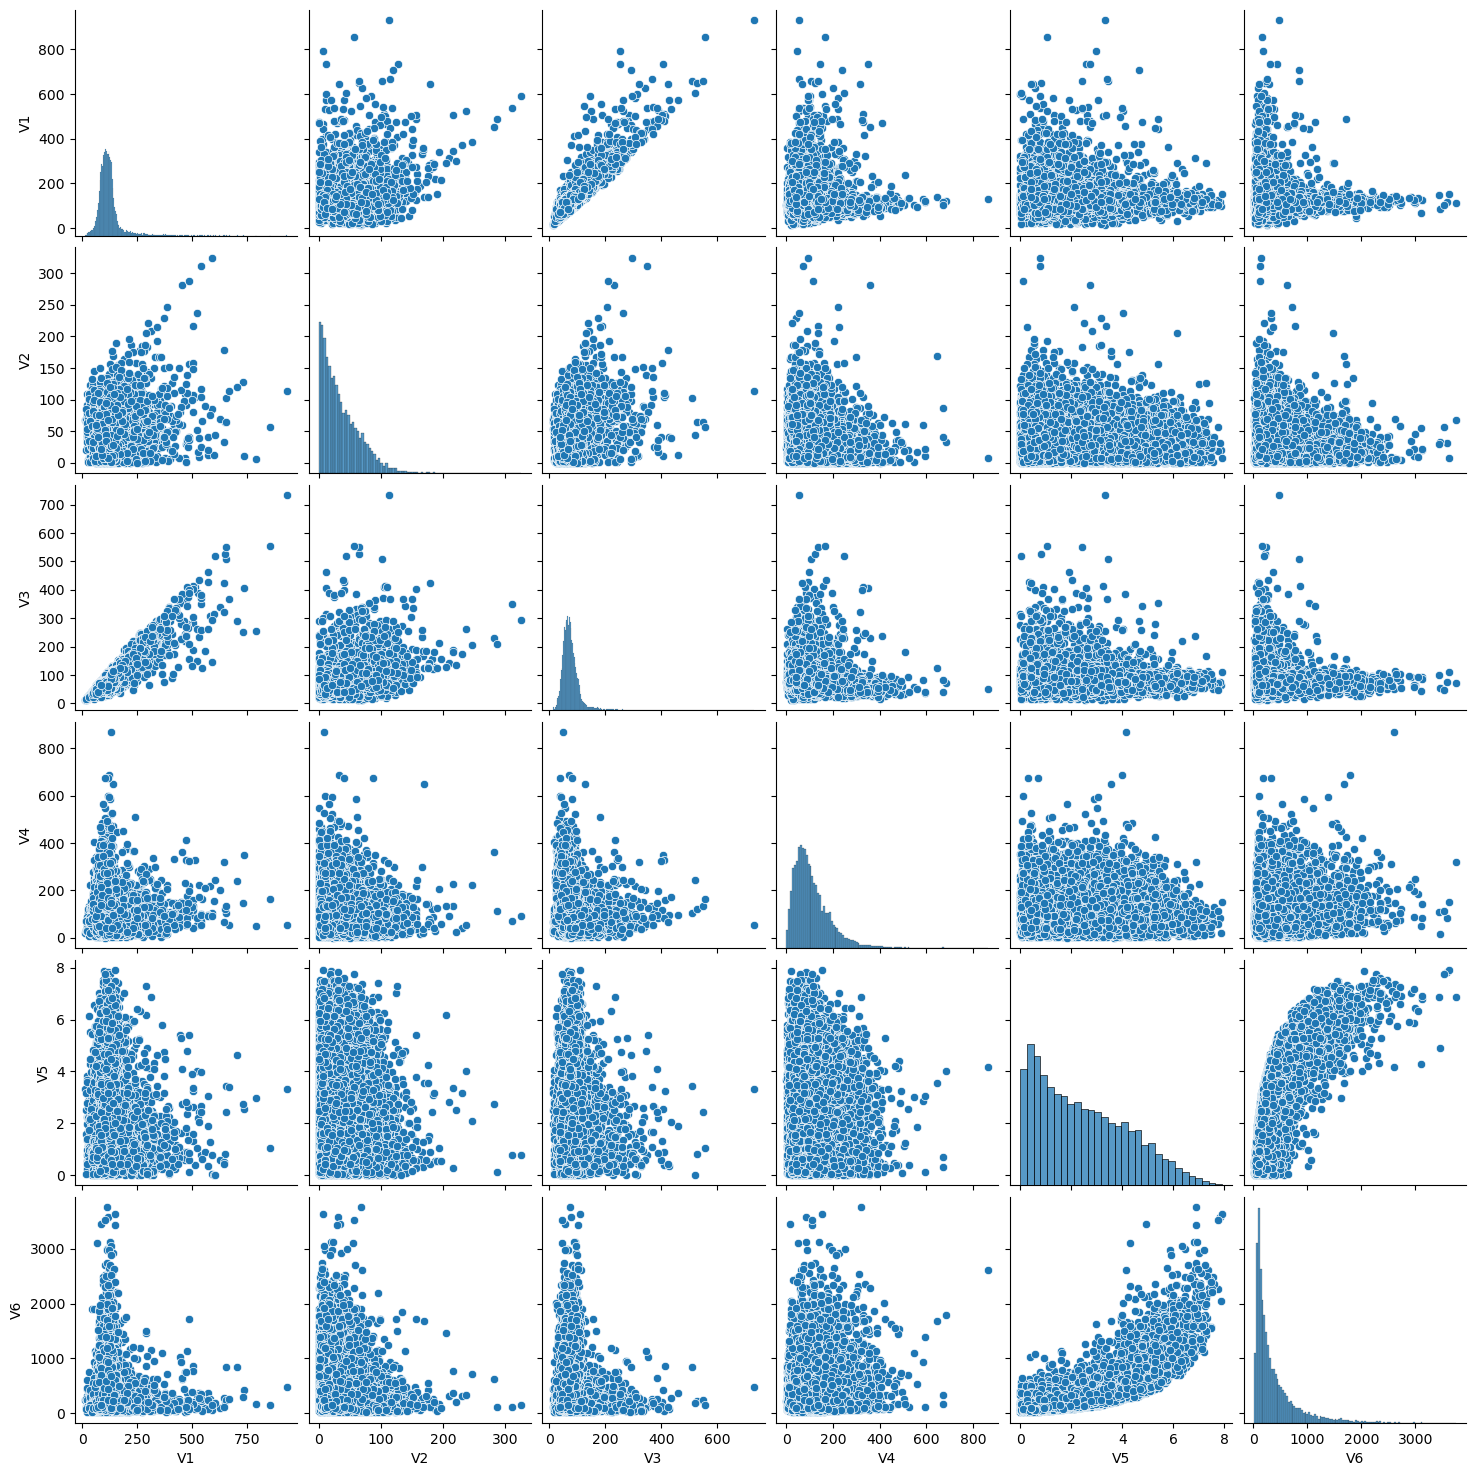

In [115]:
datab4Standardisation = pd.DataFrame(features,columns=['V1','V2','V3','V4','V5','V6'])
sns.pairplot(datab4Standardisation)
datab4Standardisation.describe()

As we can see the data range for all the features are not in the same range e.g. V1 ranges from 0-800 vs V5 which ranges from 0-8

### Doing Standardization
 Transforming the data to have a mean of 0 and standard deviation of 1

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # by default the number of iterations for logistic regression is 100 which is not enough for our Atlas data so 
                          # scaling the data as a preprocessing step as it gave ConvergenceWarning before.

scaled_features = scaler.fit_transform(features)

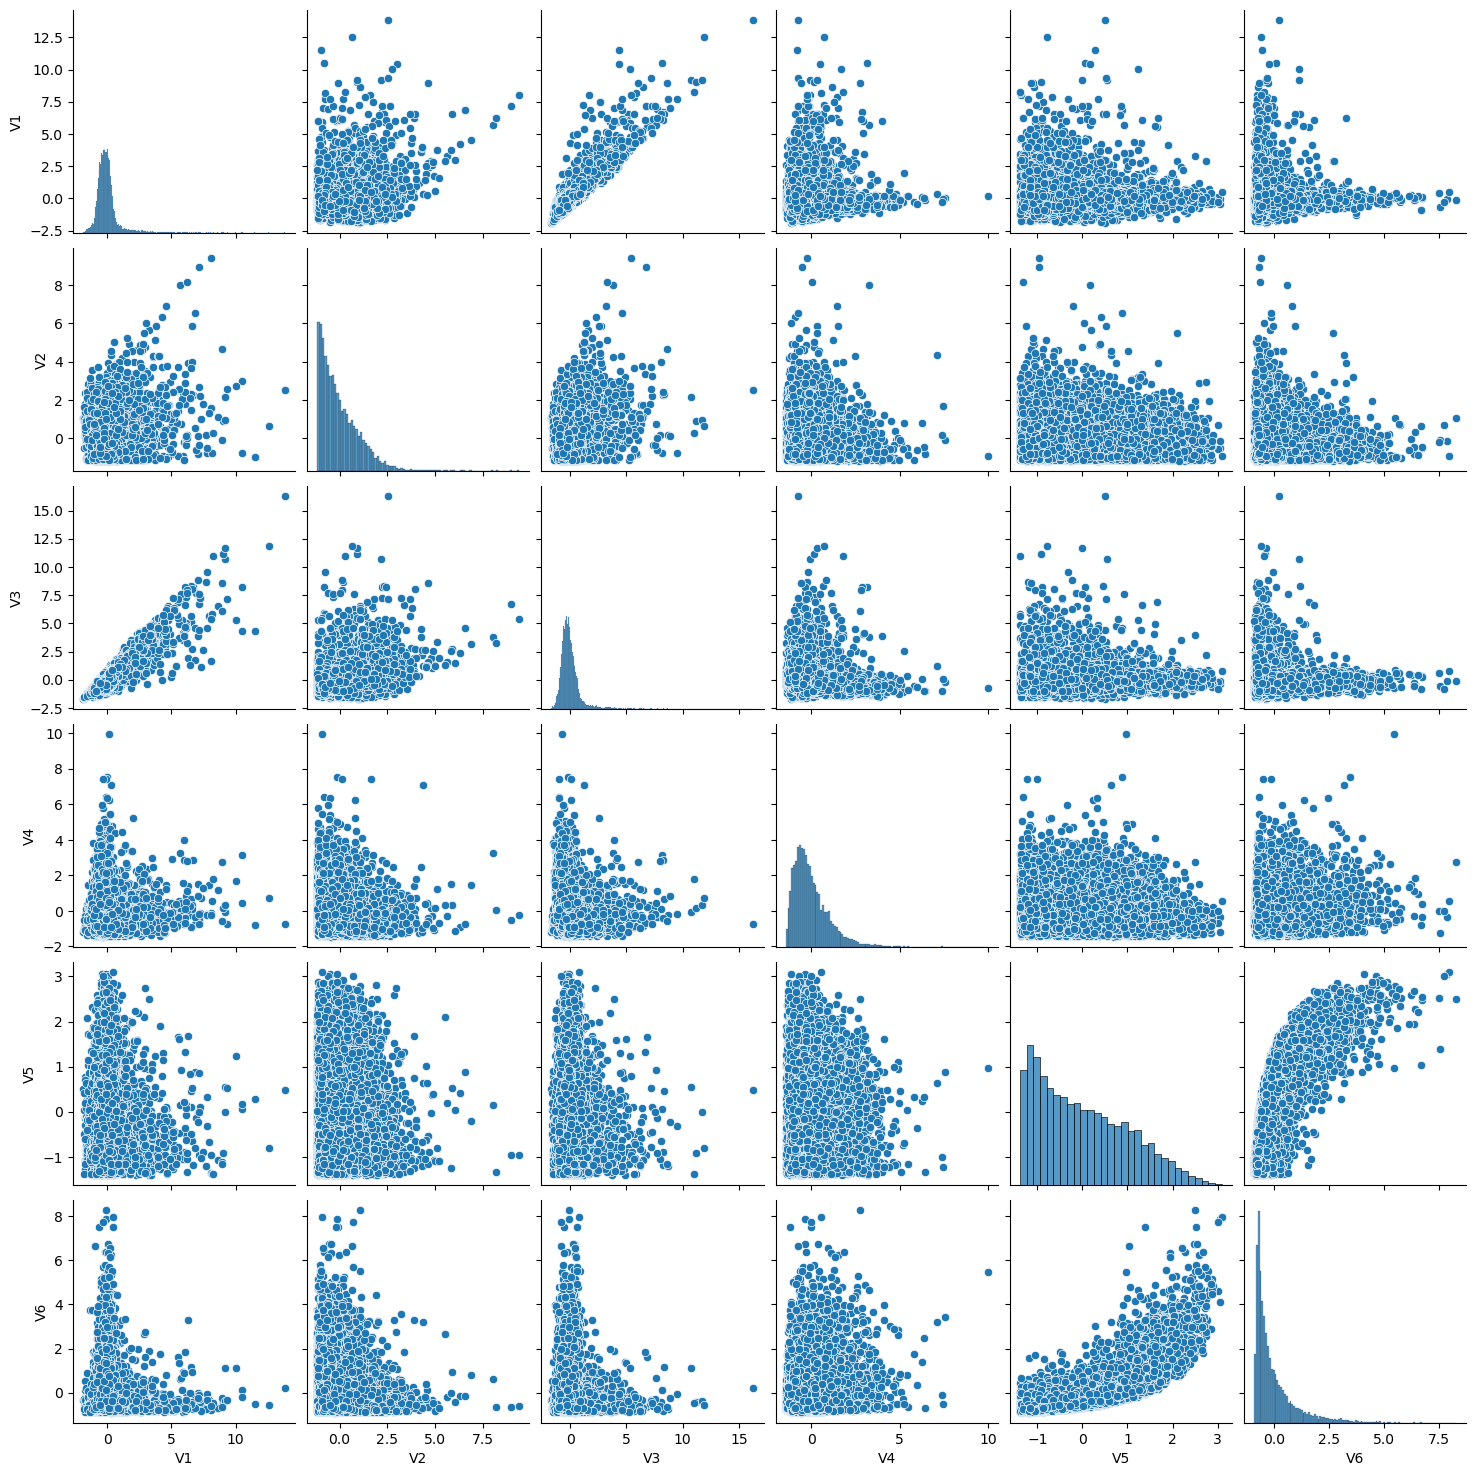

In [119]:
scaled_features= pd.DataFrame(scaled_features , columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29'])

# only visualising a subset of the scaled features as plot becomes too big for 29 features
StandardisedData = pd.DataFrame(scaled_features,columns=['V1','V2','V3','V4','V5','V6'])
sns.pairplot(StandardisedData)


Summary of data after standardisation
As we can see the deviation is 1 for all the features and mean is 0 now

In [121]:
scaled_features.describe().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,...,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,...,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.88,-1.16,-1.66,-1.44,-1.39,-0.89,-3.99,-2.07,-0.97,-1.29,...,-1.27,-1.75,-1.97,-1.13,-2.55,-1.72,-0.87,-2.17,-1.71,-1.13
25%,-0.49,-0.79,-0.53,-0.71,-0.88,-0.65,-0.50,-0.80,-0.83,-0.68,...,-0.66,-0.86,-0.67,-0.68,-0.77,-0.87,-0.64,-0.80,-0.86,-0.68
50%,-0.15,-0.26,-0.18,-0.23,-0.17,-0.36,0.17,-0.06,-0.17,-0.26,...,-0.25,0.01,-0.21,-0.29,-0.01,0.00,-0.30,0.00,-0.03,-0.27
75%,0.19,0.56,0.25,0.47,0.74,0.27,0.50,0.76,0.42,0.38,...,0.35,0.86,0.43,0.36,0.77,0.87,0.28,0.80,0.88,0.36
max,13.85,9.42,16.28,9.96,3.09,8.27,4.84,4.18,13.13,8.47,...,13.61,1.72,8.45,9.55,2.54,1.75,12.31,2.19,1.74,9.43


#### So now the data is standardized we can proceed to apply logistic Regression on our data

## Splitting into train and test Data sets doing a 80 : 20 split
### Applying Logistic Regression on the data 

In [124]:
xtrain, xtest, ytrain , ytest=train_test_split(scaled_features,target,train_size=0.8, random_state=1)
## we have split the Atlas data into training and test sets so we will first train our model using the training data

logr_model= LogisticRegression()
logr_model.fit(xtrain,ytrain) 

LogisticRegression()

## Predicting using Logistic Regression model

### Lets predict the target variable which is signal i.e. 'Event Type' after training our model using the data the model has not seen i.e. the test data split

In [127]:
predicted_event=logr_model.predict(xtest)
predicted_event

array([0, 0, 0, ..., 0, 1, 1])

## Accuracy

#### Accuracy: lets check the accuracy of the predictions made by the model using sklearn

In [130]:
accuracy= accuracy_score(ytest, predicted_event)
print ('Our model is ',accuracy*100,'% accurate')

Our model is  73.7 % accurate


## Precision
It tells how able our model is in correctly predicting or classifying our positive class i.e. signal.It focuses on accuracy.
It avoids classifying a negative class as positive.

In [132]:
precision = precision_score(ytest, predicted_event)
print ('Our model precision is ',precision)

Our model precision is  0.7123595505617978


## Recall
It is the ability to correctly identify the positive class out of all the positive instances present.If identifying the event type signal is
important than a higher recall for positive class would be good which means our model gets most or all of the event signal(1) class even if it might classify a background as signal(1).

In [134]:
recall = recall_score(ytest, predicted_event)
print ('Our model Recall value is ',recall)

Our model Recall value is  0.7013274336283186


## F1 Score
Its a measure of how good my model is at accurately classifying the correct class i.e. precision and
classifying all or most of them i.e. recall. So its a balance.

In [136]:
f1=f1_score(ytest,predicted_event)
print ('Our model F1 score is ',f1)

Our model F1 score is  0.7068004459308808


### Visualising the predicted event type vs the actual event type for given features in test data set

#### Using Table Form to see actual vs predicted event type side by side

In [139]:
import pandas as pd

# Combine Actual and Predicted values into a DataFrame
comparison_df = pd.DataFrame({
    'Actual Event Type': ytest,
    'Predicted Event Type': predicted_event
})

# 1. Filter rows where Actual and Predicted don't match
mismatches = comparison_df[comparison_df['Actual Event Type'] != comparison_df['Predicted Event Type']]

# 2. Count matched and mismatched predictions
matched_count = len(comparison_df) - len(mismatches)
mismatched_count = len(mismatches)

# 3. Display the counts
print(f"Number of Matched Predictions: {matched_count}")
print(f"Number of Mismatched Predictions: {mismatched_count}")

# 4. Display the mismatches in a table
print("\nMismatched Predictions (Actual != Predicted):")
print(mismatches.head())  # Display first few rows for brevity

# Optional: Display matched predictions as well
matched = comparison_df[comparison_df['Actual Event Type'] == comparison_df['Predicted Event Type']]
print("\nMatched Predictions (Actual == Predicted):")
print(matched.head())  # Display first few rows

Number of Matched Predictions: 1474
Number of Mismatched Predictions: 526

Mismatched Predictions (Actual != Predicted):
      Actual Event Type  Predicted Event Type
6811                  0                     1
1217                  0                     1
7673                  1                     0
6426                  0                     1
2874                  1                     0

Matched Predictions (Actual == Predicted):
      Actual Event Type  Predicted Event Type
9953                  0                     0
3850                  0                     0
4962                  0                     0
3886                  1                     1
5437                  1                     1


## Using Confusion Matrix for Logistic Regression

Using Confusion matrix to get a summary of the predicted values i.e. predicted event types vs the actual values

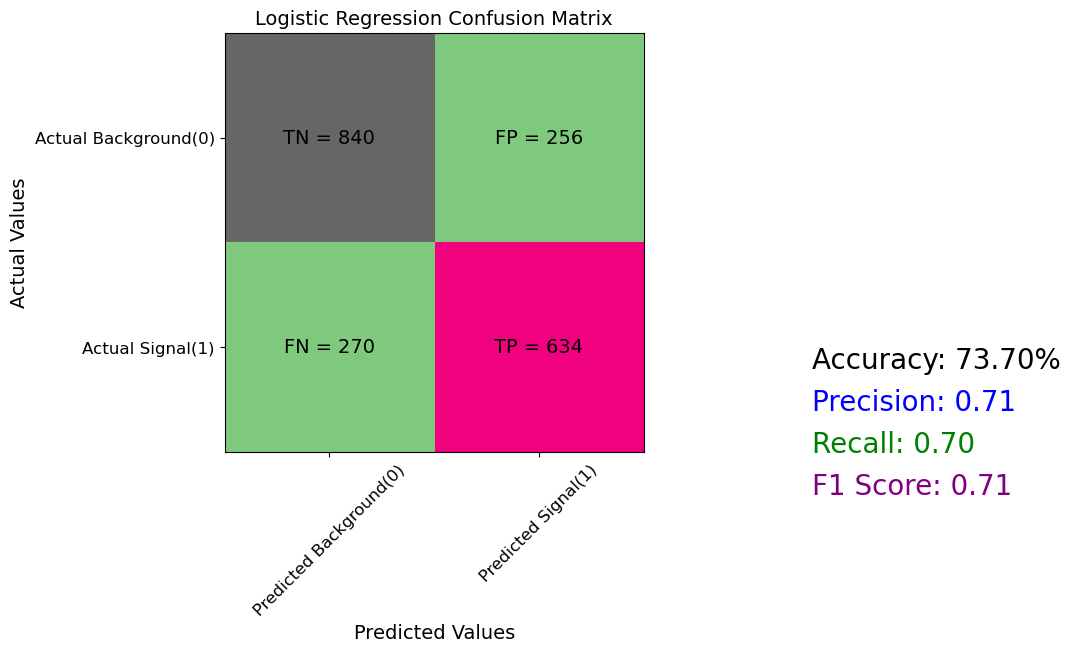

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(ytest, predicted_event)

labelsx = ['Predicted Background(0)', 'Predicted Signal(1)']
labelsy = ['Actual Background(0)', 'Actual Signal(1)']

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Accent')
plt.title('Logistic Regression Confusion Matrix', fontsize=14)

# Add class labels to axes
tick_marks = np.arange(len(labelsx))
plt.xticks(tick_marks, labelsx, rotation=45, fontsize=12)
plt.yticks(tick_marks, labelsy, fontsize=12)

# Add text annotations (TP, TN, FP, FN)
text_labels = [
    f"TN = {cm[0, 0]}", f"FP = {cm[0, 1]}",  # First row: TN, FP
    f"FN = {cm[1, 0]}", f"TP = {cm[1, 1]}"   # Second row: FN, TP
]

# Place the annotations in the correct positions
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]
for pos, label in zip(positions, text_labels):
    plt.text(pos[1], pos[0], label, ha='center', va='center', fontsize=14, color='black')

# Add axis labels
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)

# Show accuracy percentage  , precision and recall of the model
plt.text(2.3, 1.1, f'Accuracy: {accuracy*100:.2f}%', fontsize=20, color='Black')
plt.text(2.3, 1.3, f'Precision: {precision:.2f}', fontsize=20, color='blue')
plt.text(2.3, 1.5, f'Recall: {recall:.2f}', fontsize=20, color='green')
plt.text(2.3, 1.7, f'F1 Score: {f1:.2f}', fontsize=20, color='PURPLE')

# Show the plot
plt.tight_layout()
plt.show()


I am using Confusion matrix for evaluating the performance of logistic regression model as it can help us visualise easily the 
number of correct and incorrect predictions with a sum of matched and unmatched predictions with the actual classes.As we can tell there are 526 incorrect predictions and 1474 correct predictions of the classes. 

### Another visualization for the Confusion matrix values using bars for individual result values for clarity.

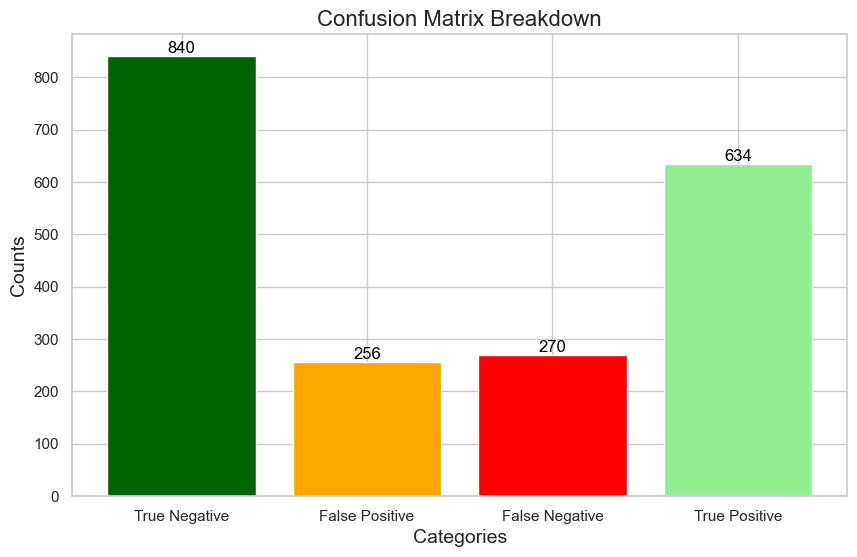

In [191]:
# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()  # True Negative, False Positive, False Negative, True Positive

# Labels and values for the bar plot
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = [tn, fp, fn, tp]

# Create grouped bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color=['darkgreen', 'orange', 'red', 'lightgreen'])

# Annotate bars with values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1, str(value),
             ha='center', va='bottom', fontsize=12, color='black')

# Add title and labels
plt.title('Confusion Matrix Breakdown', fontsize=16)
plt.ylabel('Counts', fontsize=14)
plt.xlabel('Categories', fontsize=14)
plt.show()

## Classification Report

In [ ]:
report=classification_report(ytest,predicted_event)
print("\nClassification Report:")
print(report)

#### Interpretation

Our model is 74% accurate in making correct predictions of identifying an event as a Signal or Background.

Precision score is 71 which means It tells us how many of our true predictions are actually true i.e. if an event that was predicted as Signal was actually Signal. 
Recall is 70 
F1 score is 0.71 which is closer to 1



## ROC Curve for Logistic Regression
Using ROC and AUC to evaluate classification model performance which tell us how good our model is in classifying 
specially binary classes.
Roc curve will show us how good our model separates the positive class (Signal(1)) from negative class (background(0)).
a diagnonal line will mean random guessing and a curve close to the top left shows good model performance.
AUC gives us a value for our model ability to distinguish the classes. A value of 1 means it is perfect in correctly classifying 
and 0.5 means random guessing i.e. it does not discriminate and less than 0.5 means worse performance and inability to classify 
or it makes wrong classifications.

In [ ]:
predict_prob=logr_model.predict_proba(xtest)[:,1]
# ROC
fpr, tpr, threshold = roc_curve(ytest, predict_prob)
# AUC
auc = roc_auc_score(ytest, predict_prob)
print('AUC:',  auc)

#### Trying a decision tree to see if it better performs than logistic regression model 

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(random_state=42, max_depth=5 ,min_samples_split=10, criterion='entropy', class_weight='balanced');

In [ ]:
Dtree.fit(xtrain, ytrain); 
predict_prob2 = Dtree.predict_proba(xtest)[:,1]
# ROC
fpr2, tpr2, threshold2 = roc_curve(ytest, predict_prob2)
# AUC
auc2 = roc_auc_score(ytest, predict_prob2)
print('AUC:',  auc2)

### Accuracy

In [ ]:
# Predict using test data
Dtree_pred = Dtree.predict(xtest)
Dtree_accuracy = accuracy_score(ytest, Dtree_pred)
print(f"Accuracy: {Dtree_accuracy * 100:.2f}%")

### Classification Report

In [ ]:
# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(ytest, Dtree_pred))

### Confusion Matrix for Decision Tree

In [ ]:
# Generate confusion matrix
cm2 = confusion_matrix(ytest, Dtree_pred)

labelsx = ['Predicted Background(0)', 'Predicted Signal(1)']
labelsy = ['Actual Background(0)', 'Actual Signal(1)']

plt.figure(figsize=(10, 8))
plt.imshow(cm2, interpolation='nearest', cmap='Accent')
plt.title('Decision Tree Confusion Matrix', fontsize=14)

# Add class labels to axes
tick_marks = np.arange(len(labelsx))
plt.xticks(tick_marks, labelsx, rotation=45, fontsize=12)
plt.yticks(tick_marks, labelsy, fontsize=12)

# Add text annotations (TP, TN, FP, FN)
text_labels = [
    f"TN = {cm2[0, 0]}", f"FP = {cm2[0, 1]}",  # First row: TN, FP
    f"FN = {cm2[1, 0]}", f"TP = {cm2[1, 1]}"   # Second row: FN, TP
]

# Place the annotations in the correct positions
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]
for pos, label in zip(positions, text_labels):
    plt.text(pos[1], pos[0], label, ha='center', va='center', fontsize=14, color='black')

# Add axis labels
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)

# Show accuracy percentage  , precision and recall of the model
plt.text(1.6, 0.8, f'Accuracy: {Dtree_accuracy*100:.2f}%', fontsize=20, color='Purple')

# Show the plot
plt.tight_layout()
plt.show()


### Plotting Decision Tree Model

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(Dtree, feature_names=scaled_features.columns, class_names=['Background (0)', 'Signal (1)'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


### Important Features 
lets find out what features or predictors are important in the model decision making

In [ ]:
importances = pd.Series(Dtree.feature_importances_, index=scaled_features.columns)
importances = importances.sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


## Plotting ROC curve for both classifiers Logistic and Decision Tree

In [ ]:
#create ROC curve
plt.figure(1)
plt.title('ROC - Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="AUC Logistic Regression="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.plot(fpr2,tpr2,label="AUC Decision Tree="+str(auc2))
plt.legend(loc=4)
plt.show()

If AUC is near 1, model does a good job in predicting.
As from the above plot we can see that AUC for decision tree is higher than logistic regression and above the threshold of 0.5.
Logistic regression performs moderately but is not good enough compared to a decision tree for correctly predicting both the negative and positive class.

In [ ]:
# From graph above 
print('AUC for Logistic Regression is:',  auc) 
print('AUC for Decision Tree is:',  auc2)

### Analysis of model performance and explanation of evaluation metrics 

#### Logistic Regression model
#### Accuracy
As we can see from the evaluation metrics for logistic regression that the accuracy for the model is 74%.
So it is 74 percent accurate in predicting the correct even type.

#### Precision
Precision which is a measure of how well the model correctly predicts the signal class. Its precision score is 71 which means it correctly predicts only 71% of the signal class instances.

#### F1 score
F1 score for positive class predictions is lower than the negative class predictions i.e. Signal event type is 0.71 compared to detecting the background noise which is higher at 0.76.

#### Recall
Recall is 0.70 for the positive class (signal) and 0.77 for negative class which means it detects more background noises compared to detecting signal so it passes event types as background noises more often compared to passing a event type as a signal event.

We can tell from above metrics that for identifying our positive class event type signal(1) our model is more biased towards identifying background noise and does not do a good job identifying the signal event type.
Even the recall score suggests that it misses some signal event types i.e. misses actual positive instances i.e. signal (1)
Logistic regression model appears to be more biased towards the negative class i.e. background(0).
Overall the model performs poorly for positive class signal(1) as scores are lower for it compared to negative class background(0) hence a more complex model such as decision tree would be better to classify the signal class and is more flexible.

#### Decision Tree model
Decision tree accuracy is 79% in correctly predicting the event types comapred to logistic regression.
I used decision tree to compare the model with logistic regression for this particular dataset to classify signall class. As the features might not be linearly related to event type hence a decision tree might be better at capturing than the logistic regression model.
It is clear from the evaluation metrics such as confusion matrix. 
Decision tree has higher F1 score and hence gives more reliable predictions for positive class signal(1). 
As the decision tree interacts with the features when making splits it captures the relationship better.


#### Decision Tree  model does a better job of classifying the data into Signal or Background classes compared to the Logistic regression given overfitting is accounted for which can be done easily by adjusting the depth and splitting criteria.